# Análise de redes e medidas de centralidade

Em seguida, vamos aprender sobre algumas técnicas de análise que são aplicadas em grafos em geral, e
em grafos de redes sociais em particular.

Uma das análises comuns é descobrir nós que são particularmente importantes na rede. Isso nos leva
às chamadas *medidas de centralidade*, que representam o nível de importância, ou *centralidade*
de um nó na rede. Duas medidas de centralidade são bastante utilizadas:

- Centralidade de grau (*degree centrality*)
- Centralidade de intermediação (*betweenness centrality*)


## Centralidade de grau

A centralidade de grau é baseada na ideia que nós com graus mais altos estão conectado a um número maior
de outros nós, e isso pode se traduzir em influência ou outras formas de importância. Por exemplo, em uma
rede social (cujos nós são pessoas) uma pessoa com grau alto está conectado a um grande número de pessoas,
e portanto pode-se considerar que essa pessoa tem influência mais alta que outra pessoa com grau menor.
No caso de uma rede social online, ter grau alto geralmente significa que suas publicações vão ser vistas por
mais pessoas.

Vamos demonstrar algumas das ideias com um grafo pequeno, e depois as atividades serão baseadas na rede de atores.

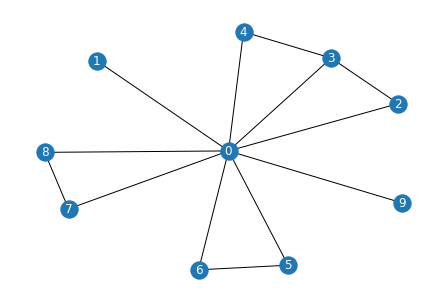

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in range(10):
    G.add_node(i)

for j in range(1, 10):
    G.add_edge(0, j)

G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(5, 6)
G.add_edge(7, 8)

nx.draw(G, with_labels=True, font_color="white")
plt.show()

Neste grafo, vemos que o nó 0 tem grau maior que os outros, então ele aparenta ser mais "central" no grafo. O nó
3 também está mais conectado que a maioria dos outros, exceto o nó 0. O grau do nó 0 é 9, do nó 3 tem grau 3, os
nós 2, 4, 5, 6, 7 e 8 têm grau 2, e os nós 1 e 9 têm grau 1. Nessa medida, o nó 0 seria o mais importante, seguido
pelo nó 3, depois os nós de grau 2, e por fim os nós de grau 1 como os menos importantes.

A medida de centralidade do grau é uma normalização do grau de cada nó na rede, com relação ao grau
máximo que um nó poderia chegar nesse grafo. A centralidade de grau do nó $n$, $dc(n)$ pode ser calculada
da seguinte forma:

$$dc(n) = \frac{gr(n)}{D}$$

onde $gr(n)$ é o grau do nó $n$ e $D$ é o grau máximo que o nó poderia ter. Em geral, $D = N-1$, onde $N$ é
o número de nós no grafo. Ou seja, o grau máximo normalmente vai ser igual ao número de nós menos 1, que
é o maior número de nós com os quais um nó pode estar ligado.

Isso significa que, dentro do mesmo grafo, a centralidade de grau do nó, $dc(n)$ sempre vai ser proporcional
ao grau do nó, e podemos comparar a centralidade de grau de nós diferentes apenas comparando o grau. Para
comparar nós em grafos diferentes, a normalização pode ser mais interessante.

### Obtendo o grau de um nó

Usando NetworkX, é fácil obter o grau do nó através da propriedade `degree` do grafo, que
é indexada pelo identificador do nó:

In [2]:
def imprime_grau(n):
    print(f"O grau do nó {n} é {G.degree[n]}")

for n in G.nodes(data=False):
    imprime_grau(n)

O grau do nó 0 é 9
O grau do nó 1 é 1
O grau do nó 2 é 2
O grau do nó 3 é 3
O grau do nó 4 é 2
O grau do nó 5 é 2
O grau do nó 6 é 2
O grau do nó 7 é 2
O grau do nó 8 é 2
O grau do nó 9 é 1


Embora seja simples de calcular, a centralidade de grau pode ser obtida diretamente da biblioteca
NetworkX usando a função `nx.degree_centrality`. Essa função retorna um dicionário cuja chave é o identificador
do nó e os valores são os valores de centralidade.

In [3]:
centralidade_G = nx.degree_centrality(G)

for n in G.nodes(data=False):
    print(f"O centralidade de grau do nó {n} é {centralidade_G[n]}")


O centralidade de grau do nó 0 é 1.0
O centralidade de grau do nó 1 é 0.1111111111111111
O centralidade de grau do nó 2 é 0.2222222222222222
O centralidade de grau do nó 3 é 0.3333333333333333
O centralidade de grau do nó 4 é 0.2222222222222222
O centralidade de grau do nó 5 é 0.2222222222222222
O centralidade de grau do nó 6 é 0.2222222222222222
O centralidade de grau do nó 7 é 0.2222222222222222
O centralidade de grau do nó 8 é 0.2222222222222222
O centralidade de grau do nó 9 é 0.1111111111111111


Vemos que o nó 0 tem o maior valor de centralidade de grau possível, 1, pois ele está 
conectado a todos os outros nós do grafo. 

A seguir vamos fazer algumas atividades com esses conceitos. 

# Atividades

Primeiramente, é preciso carregar o grafo de atores que foi preparado previamente a partir dos dados do IMDb:

In [6]:
rede_atores = nx.read_gexf("grafo_atores.gexf")

## 1. Interpretação da centralidade de grau

Em uma rede de aeroportos e vôos (como a que foi explorada na atividade anterior) o que significa
um nó (aeroporto) com alto valor para a centralidade do grau?

R: Seria que ele possui um grau elevado, com isso, não seria necessário gastar tempo e dinheiro tendo que passar por um ou mais aeroportos antes de chegar no destino final.

## 2. Cálculo dos graus na rede de atores

Crie uma lista com os valores do grau de cada nó da lista de atores. Por exemplo, no grafo
`G` dos exemplos acima, a lista de graus seria:

In [7]:
graus_G = [9, 1, 2, 3, 2, 2, 2, 2, 2, 1]

Não é necessário que a lista esteja ordenada, apenas que esteja registrado o grau de cada nó, mesmo com
valores repetidos, pois vamos usar essa lista posteriormente para observar a distribuição dos
graus ao longo do grafo.

*Dica*: A forma mais compacta de fazer isso é usando uma compreensão de lista (*list comprehension*) da
linguagem Python. Mas também é possível usar um loop.

In [8]:
# TODO: calcula os graus de cada nó da rede de atores

lista_graus = [rede_atores.degree(n) for n in rede_atores.nodes()]

## 3. Histograma dos graus

Baseado na lista criada no item anterior, crie um histograma para visualizar a distribuição dos graus
na rede de atores. Use a função `hist` do pacote `plt`. Analise o resultado visualizado no histograma,
por exemplo, existem mais nós de grau baixo ou alto? A distribuição de graus segue algum padrão e, caso
siga, é o padrão esperado para esse tipo de rede? Justifique suas respostas, e veja se consegue obter
outras conclusões a partir da distribuição observada.

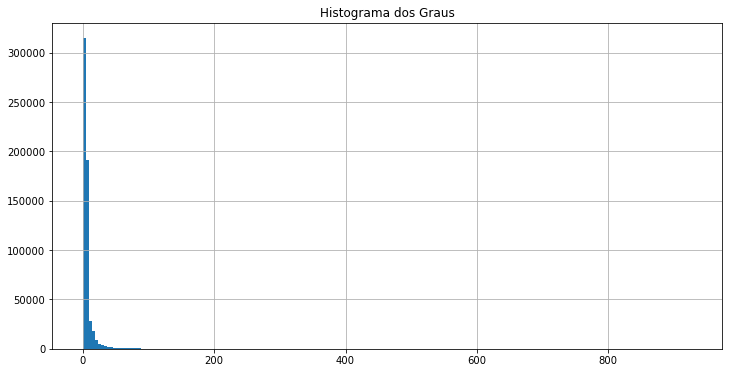

In [9]:
# TODO: cria histograma dos graus na rede de atores

plt.figure(figsize=(12,6))
plt.grid()
plt.title('Histograma dos Graus')
plt.hist(lista_graus, bins=200)
plt.show()

Existem mais nós de grau baixo, o que conseguimos ver é que muitos atores conhecem poucos atores, alguns chegam a conhecer muitos, acredito que nesse ramo possa existir concerrência, o que resulta na falta de amizade entre os atores.

## 4. Análise de nós com grau alto

Quais são os cinco valores de grau mais alto na rede? Quantas pessoas estão associadas a nós com esses valores
de grau? (Por exemplo, digamos que os dois maiores valores sejam grau 30 e 28; quantos nós têm grau 30,
quantos têm grau 28, e assim por diante). Selecione alguns nós de cada um desses valores de grau, ache quem
são as pessoas associadas aos nós e faça uma análise (se são atores famosos, aparecem em muitos filmes etc).

In [10]:
# TODO: obter maior grau na rede, e nós que possuem esse grau
import numpy as np

k = 5
ind_graus = np.argsort(lista_graus)[::-1][:k]
maiores_graus = [lista_graus[ind] for ind in ind_graus]
maiores_graus

[927, 749, 651, 619, 603]

In [11]:
dic = {}

for grau in maiores_graus:
    dic[grau] = [0]
    
for n in rede_atores.nodes():
    for grau in maiores_graus:
        if rede_atores.degree(n) == grau:
            dic[grau].append(n)
            dic[grau][0] += 1

dic

{927: [1, 'nm0103977'],
 749: [1, 'nm0000616'],
 651: [1, 'nm0007106'],
 619: [1, 'nm0149822'],
 603: [1, 'nm0430803']}

In [12]:
for key in dic:
    print(rede_atores.nodes()[dic[key][1]]['nome'])

Brahmanandam
Eric Roberts
Shakti Kapoor
Mithun Chakraborty
Mohan Joshi


São todos homens acima dos 60 anos que começaram cedo no ramo do cinema e do teatro, então é aceitável que eles conheçam muitos atores.

## 5. Busca por nome

Crie uma função que busca um ator no grafo por nome, e retorna o identificador desse ator.

**Opcional**: Como acertar a grafia exata do nome do ator às vezes pode ser difícil, pesquise e implemente
uma busca com imprecisões (*fuzzy search*). Na biblioteca padrão da linguagem Python existe o `SequenceMatcher` no
pacote `difflib`, e existem pacotes externos que calculam distância de Levenshtein e outras métricas usadas para
*fuzzy matching*.

Escolha um ator ou atriz do seu interesse. Busque na rede para obter o identificador da pessoa no grafo, e
calcule o grau do nó associado.

In [13]:
!pip install jellyfish

In [22]:
# TODO: busca um nó específico no grafo de atores, pelo nome
import difflib as diff
import jellyfish as jf


def busca_pessoa(nome):
    
    for n, node in rede_atores.nodes(data=True):
        if node['nome'] == nome:
            return rede_atores.nodes()[n]['label']
    
    return None

def fuzzy_search(nome_):
    for n, node in rede_atores.nodes(data=True):
        distance = jf.levenshtein_distance(nome_, node['nome'])
                
        if distance <= 4:  
            return node['nome'], node['label']
    
    return None

In [28]:
identificador = busca_pessoa('Eric Roberts')
identificador

'nm0000616'

In [29]:
rede_atores.degree(identificador)

749

In [24]:
fuzzy_search('Eric Robe')

('Eric Roberts', 'nm0000616')

In [25]:
fuzzy_search('Shakti Kap')

('Shakti Kapoor', 'nm0007106')

In [26]:
fuzzy_search('Mitun Chacrabort')

('Mithun Chakraborty', 'nm0149822')

## 6. Cálculo da centralidade de grau

Crie uma função para calcular a centralidade de grau de um nó do grafo. Essa função pode
ser genérica para qualquer grafo ou pode ser específica para o grafo de atores.

A biblioteca NetworkX já inclui uma função para calcular a centralidade de grau de um
nó, a função `nx.degree_centrality`. Selecione alguns nós do grafo de atores e teste sua função, comparando
com o valor obtido pela função `nx.degree_centrality`.

In [157]:
# TODO: Calcula a centralidade de grau do nó n no grafo G
def centralidade_grau(G, n):
    i = 0
    
    for node in G.nodes():
        i += 1
        
        if node == n:
            grau_n = lista_graus[i-1]
            
            return grau_n / ( G.number_of_nodes() - 1 )
        
    return None

In [158]:
centralidade_grau(rede_atores, 'nm0000616')

0.0012785191709596916

In [148]:
centrality = nx.degree_centrality(rede_atores)

In [156]:
centrality['nm0000616']

0.0012785191709596916